In [1]:
#import sqlite3 module
import sqlite3
import pandas as pd

In [2]:
# Read data from Excel file into a pandas DataFrame
df = pd.read_csv('Telecoms company data.csv')

In [3]:
#connectng to the telecomms databse
conn = sqlite3.connect('Telecoms.db')

In [4]:
# Write DataFrame to SQLite database
df.to_sql('telecoms_table', conn, if_exists='replace', index=False)

7043

In [5]:
# Close the connection
conn.close()

In [6]:
#load the %sql magic command after pip installing the ipython 
%load_ext sql

In [7]:
#establish a connection
%sql sqlite:///telecoms.db

In [8]:
%sql SELECT * FROM telecoms_table LIMIT 5


 * sqlite:///telecoms.db
Done.


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [9]:
#count the total number of rows
%sql SELECT COUNT(*) FROM telecoms_table

 * sqlite:///telecoms.db
Done.


COUNT(*)
7043


In [10]:
#unique entries in churn column
%sql SELECT DISTINCT Churn FROM telecoms_table

 * sqlite:///telecoms.db
Done.


Churn
No
Yes


In [11]:
%sql SELECT COUNT(*) FROM telecoms_table WHERE churn IS NULL

 * sqlite:///telecoms.db
Done.


COUNT(*)
0


In [12]:
%sql PRAGMA table_info(telecoms_table);


 * sqlite:///telecoms.db
Done.


cid,name,type,notnull,dflt_value,pk
0,customerID,TEXT,0,None,0
1,gender,TEXT,0,None,0
2,SeniorCitizen,INTEGER,0,None,0
3,Partner,TEXT,0,None,0
4,Dependents,TEXT,0,None,0
5,tenure,INTEGER,0,None,0
6,PhoneService,TEXT,0,None,0
7,MultipleLines,TEXT,0,None,0
8,InternetService,TEXT,0,None,0
9,OnlineSecurity,TEXT,0,None,0


In [14]:
%sql SELECT Contract, COUNT(*) AS count FROM telecoms_table GROUP BY Contract;

 * sqlite:///telecoms.db
Done.


Contract,count
Month-to-month,3875
One year,1473
Two year,1695


In [16]:
%sql SELECT DISTINCT gender FROM telecoms_table;


 * sqlite:///telecoms.db
Done.


gender
Female
Male


In [13]:
import pandas as pd
import sqlite3
def wrangle(db_path):
    #connecting to database
    conn = sqlite3.connect(db_path)
    query = """
        SELECT * FROM telecoms_table
    """
    #read query results to a dataframe
    df = pd.read_sql(query, conn)
    
    #identify leaky columns
    drop_cols = [col for col in df.columns if "customerID" in col]
    
    # Add high-cardinality / redundant column
    drop_cols.append("customerID")
    
    
    # Drop columns
    df.drop(columns=drop_cols, inplace=True)
    
    return df

In [14]:
df = wrangle(r"C:\Users\ERICA COMPUTER HUB\FLIT-Data-Science-Projects-1-15\Churn Prediction Modelling\Telecoms.db")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Explore

In [10]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
# Convert "TotalCharges" column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert "Churn" column to numeric if it's not already binary (0 or 1)
if df['Churn'].dtype != int:
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop rows with missing values in "TotalCharges" column (if any)
df.dropna(subset=['TotalCharges'], inplace=True)

# Compute Pearson correlation coefficient
pearson_corr = df['TotalCharges'].corr(df['Churn'])

print("Pearson Correlation Coefficient:", pearson_corr)

Pearson Correlation Coefficient: -0.19948408356756436


# Split

In [22]:
target = "Churn"
X= df.drop(columns = [target])
y=df[target]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Model

In [25]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.73


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

model_lr = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(max_iter = 1000)
)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Evaluate

In [35]:
acc_train = model_lr.score(X_train, y_train)
acc_test = model_lr.score(X_test, y_test)

print("LR Training Accuracy:", acc_train)
print("LR Validation Accuracy:", acc_test)

LR Training Accuracy: 0.9154815115806583
LR Validation Accuracy: 0.7909952606635071


# Communicate Results

In [36]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
importances = model_lr.named_steps["logisticregression"].coef_[0]
feat_imp = pd.Series(np.exp(importances), index=features)
feat_imp.head()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [42]:
import numpy as np
# Retrieve feature names from OneHotEncoder's categories_
categories = model_lr.named_steps["onehotencoder"].categories_
feature_names = np.concatenate(categories)

# Retrieve importances from LogisticRegression coefficients
importances = model_lr.named_steps["logisticregression"].coef_[0]

# Create a pandas Series with feature importances
feat_imp = pd.Series(np.exp(importances), index=feature_names)
feat_imp

Female     0.996621
Male       0.997844
0          0.883089
1          1.126129
No         0.925379
             ...   
8476.5     0.978374
8529.5     0.975415
8547.15    0.970242
8594.4     0.975387
8684.8     2.157259
Length: 6248, dtype: float64

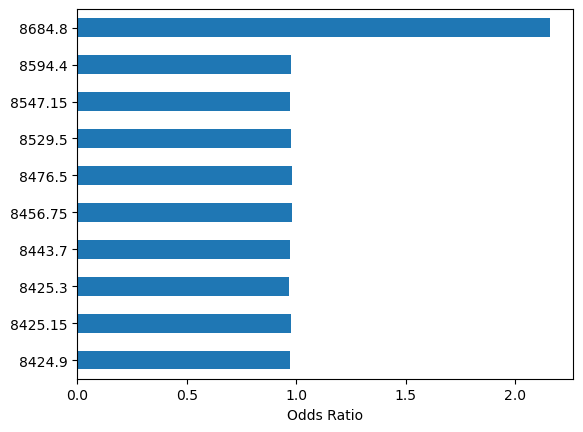

In [45]:
import matplotlib.pyplot as plt
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Odds Ratio");

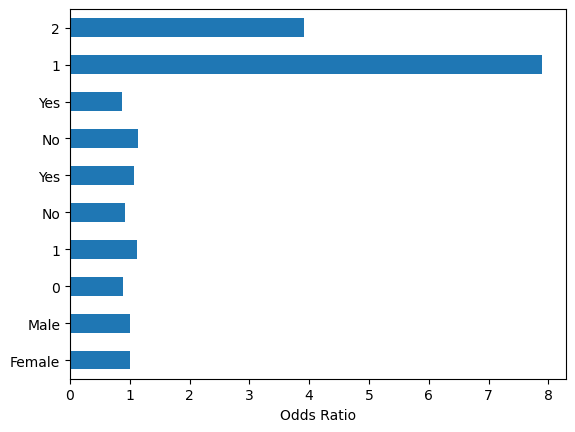

In [46]:
feat_imp.head(10).plot(kind="barh")
plt.xlabel("Odds Ratio");

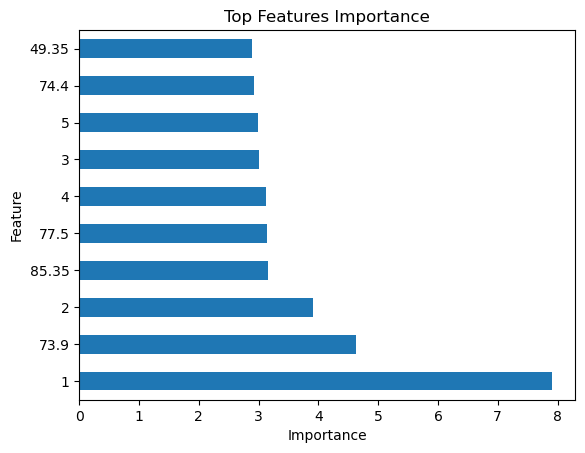

In [47]:
# Sort the feature importances
feat_imp_sorted = feat_imp.sort_values(ascending=False)

# Visualize the top features and their coefficients
top_features = feat_imp_sorted.head(10)
top_features.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features Importance')
plt.show()


# Save the Model

In [48]:
import joblib

# Save the model to a file
joblib.dump(model_lr, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']